# Proyecto de Preprocesamiento de Datos

In [49]:
# Librería para la declaración y uso de Data Frames:
import pandas as pd

# Librería para gráficos:
import matplotlib.pyplot as plt

# Librería para realizar operaciones matemáticas: 
import numpy as np

# Librería para visualizar y analizar nulos en Data Frames: 
import missingno as msno

# Librería codificar variables categóricas a numéricas:
from sklearn.preprocessing import LabelEncoder

# Librería para generar un modelo de Regresión Lineal: 
import statsmodels.api as sm




## Paso 1 - Lectura de los datos:


En primer lugar, es necesario leer y guardar la información en una variable para poder empezar a trabajar con ella. 

Para ello, se ha guaradado el archivo con todos los datos en la ruta: */workspaces/machine-learning-python-template-clara/data/raw/AB_NYC_2019.csv* y se ha cargado en un Data Frame:

In [50]:
# Lectura del CSV con los datos, dada la ruta donde se guarda el archivo (se ha evitado cargar la primera columna con los índices de las filas):
df = pd.read_csv ('/workspaces/machine-learning-python-template-clara/data/raw/AB_NYC_2019.csv').iloc[:,1:]

# Configuración de pandas para mostrar todas las columnas del DataFrame sin truncarlas al visualizarlo
pd.set_option('display.max_columns', None)

# Se muestran las 5 primeras filas del Data Frame
df.head()


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Una vez se ha cargado correctamente la información en el Data Frame `df` es interesante evaluar la cantidad de información que se tiene. Para ello, se recurre al atributo `shape` del Data Frame:

In [51]:
# Se utiliza el atributo shape del Data Frame para conocer cuánta información está cargada:
print(f" El archivo cargado contiene {df.shape[0]} anuncios de casas en Airbnb, cada una ellas con un total de {df.shape[1]} características"); 

 El archivo cargado contiene 48895 anuncios de casas en Airbnb, cada una ellas con un total de 15 características


Ahora que ya se han cargado los datos y se tiene información sobre los mismos, se ha de proceder a realizar un filtrado de los datos realmente relevantes para el análisis. 

## Paso 2 - Limpieza a partir del Análisis de Constantes y Datos Duplicados:

Uno de los puntos críticos a la hora de realizar un análisis, es la **existencia de variables / características comunes a todos los anuncios**, dado que sería **información redundante** y no aportaría valor al estudio, es decir, el análisis sería el mismo aunque no estuviesen como variables y, por lo tanto, se podría prescindir de ellas.

Si se translada esto al Data Frame, estas **constantes** serían **valores comunes a todas las filas dentro de una misma columna**. 

Para detectarlas, se va a utilizar el método `nunique()` del Data Frame, de forma que se obtenga información sobre la cantidad de valores distintos dentro de cada columna:

In [52]:
# Se utiliza el método .nunique() para saber la cantidad de columnas con constantes en el Data Frame:
print(f" Hay un total de {(lambda df: (df.nunique() == 1).sum())(df)} columnas en el Data Frame con un valor constante para todos los anuncios");


# Se imprime el conteo de valores distintos en cada columna:
print (f" \nPara cada columna del Data Frame, se muestran cuántos valores distintos presentan:");
df.nunique()


 Hay un total de 0 columnas en el Data Frame con un valor constante para todos los anuncios
 
Para cada columna del Data Frame, se muestran cuántos valores distintos presentan:


name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

A partir del resultado obtenido, se puede observar que **no hay ninguna constante** en los datos cargados, por lo tanto, **no hay que eliminar ninguna columna**, de momento.

Otro factor determinante a la hora de realizar una limpieza de los datos es detectar **si hay datos repetidos**, aplicado a este caso, si hay **anuncios duplicados**. 

Para ello, se utiliza otro de los métodos que ofrecen los Data Frames `.duplicated()`

In [53]:
# Se utiliza el método .duplicated() para identificar los anuncios repetidos dentro del DataFrame:
print(f" Hay un total de {df.duplicated().sum()} anuncios duplicados.");

 Hay un total de 0 anuncios duplicados.


En este caso, **no se han encontrado anuncios duplicados** por lo que **no es necesario eliminar ninguna fila** del Data Frame.

## Paso 3 - Limpieza a partir de Información Estadística:

Una vez ya se ha realizado un **estudio básico** para realizar una **primera limpieza** de datos, a partir del análisis de constantes y duplicados, se puede pasar a **observar estadísticamente** la información y decidir qué datos son **poco relevantes**.

Para ello, en primer lugar, se va a recurrir al método `.describe()` para tener un **resumen estadístico** de todos los datos, tanto los categóricos como los numéricos.

En este resumen, los puntos más interesantes son, por un lado, los **mínimos y los máximos** en las variables **numéricas** y el **top value** y su **frecuencia** para las variables **categóricas**. 

In [54]:
# Descripción estadística básica de todas las columnas del DataFrame:
df.describe(include='all').T # Se traspone para ver de forma más clara los datos

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,48879,47905,Hillside Hotel,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,48895.0,NaN,NaN,NaN,67620010.64661,78610967.032667,2438.0,7822033.0,30793816.0,107434423.0,274321313.0
host_name,48874,11452,Michael,417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,48895,5,Manhattan,21661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,48895,221,Williamsburg,3920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,48895.0,NaN,NaN,NaN,40.728949,0.05453,40.49979,40.6901,40.72307,40.763115,40.91306
longitude,48895.0,NaN,NaN,NaN,-73.95217,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
room_type,48895,3,Entire home/apt,25409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,48895.0,NaN,NaN,NaN,152.720687,240.15417,0.0,69.0,106.0,175.0,10000.0
minimum_nights,48895.0,NaN,NaN,NaN,7.029962,20.51055,1.0,1.0,3.0,5.0,1250.0


Lo primero que llama la atención es el **mínimo a 0 unidades monetarias en la columna de 'Price'**. Este valor es completamente imposible en cualquier apartamento de Airbnb. 

Por ello, se puede **prescindir de todos los anuncios que tengan este valor** en la columna de precios, dado que se podría tratar de anuncios fraudulentos o con un error. 


In [55]:
# El Data Frame se filtra guardando solo las filas mayores de 0 en la columna "Price":
df_clean = df[df['price'] > 0];

Al haber encontrado esta información *extraña* en la columna 'Price' del conjunto de datos, es interesante **mostrar en un gráfico cuál es la distribución de los precios** de los apartamentos para saber cómo se comporta esta característica.

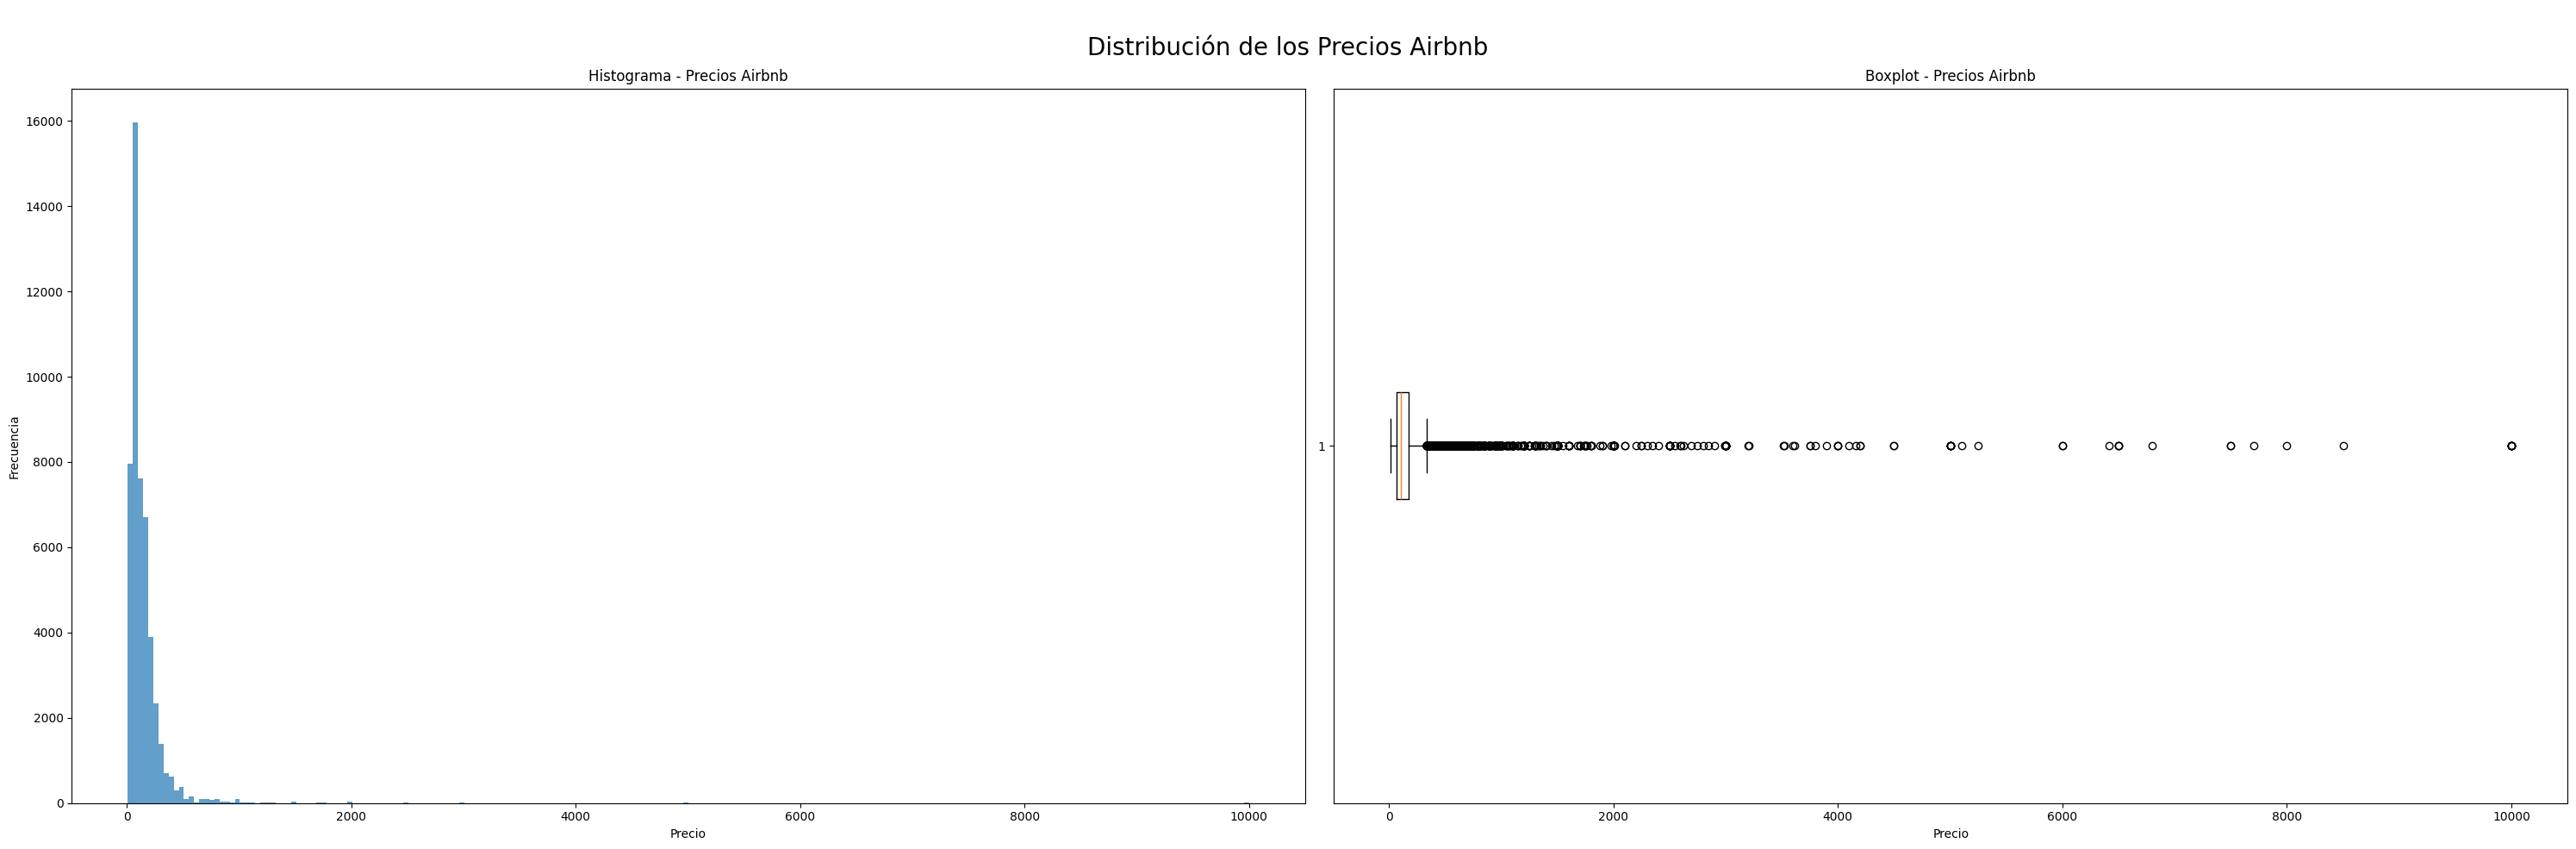

In [56]:
# Se trazan los gráficos utilizando la función de Matplotlib:
plt.figure(figsize = (30, 10));

# Subplot para el Histograma:
plt.subplot(1, 2, 1); 
plt.hist(df_clean['price'], bins=220, alpha = 0.7); # Como estimación para saber el bins se ha usado el redondeo de la raíz cuadrada del total de los datos que se manejan
plt.title("Histograma - Precios Airbnb");
plt.xlabel('Precio');
plt.ylabel('Frecuencia');

# Subplot para la Boxplot: 
plt.subplot(1, 2, 2);
plt.boxplot(df_clean['price'], vert = False);
plt.title("Boxplot - Precios Airbnb");
plt.xlabel("Precio");

# Mostrar la figura:
plt.suptitle("\nDistribución de los Precios Airbnb", fontsize = 20);
plt.tight_layout()
plt.show()

En ambos gráficos es evidente que los precios tienen una **distribución altamente sesgada** con una mayoría de datos concentrados en **valores por debajo de las 2000 unidades monetarias** y **varios outliers significativos**.

Por esta razón, se va a realizar una **transformación logarítimica**, de forma que se reduzca la asimetría, comprimiendo los valores extremos. 

Esta transformación se colocará en **otra columna del Data Frame**, teniendo así una columna con los precios sin transformar, `price` y otra con los precios en logarítimico `log_price`.

Un punto importante es que, al haber eliminado previamente los anuncios cuyo precio era 0, no se va a tener problema en esta transformación. En caso de no haberlo hecho, se tendría que haber realizado este paso ahora, dado que el logaritmo de 0 es infinito. 

In [57]:
# Se genera otra columna con el precio en escala logarítmica:
df_clean['log_price'] = np.log(df_clean['price']);


/tmp/ipykernel_781/717415078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['log_price'] = np.log(df_clean['price']);


Una vez se ha realizado esta transformación, es interesante volver a **trazar los gráficos anteriores** (histograma y boxplot) para comprobar que se ha eliminado la asimetría:

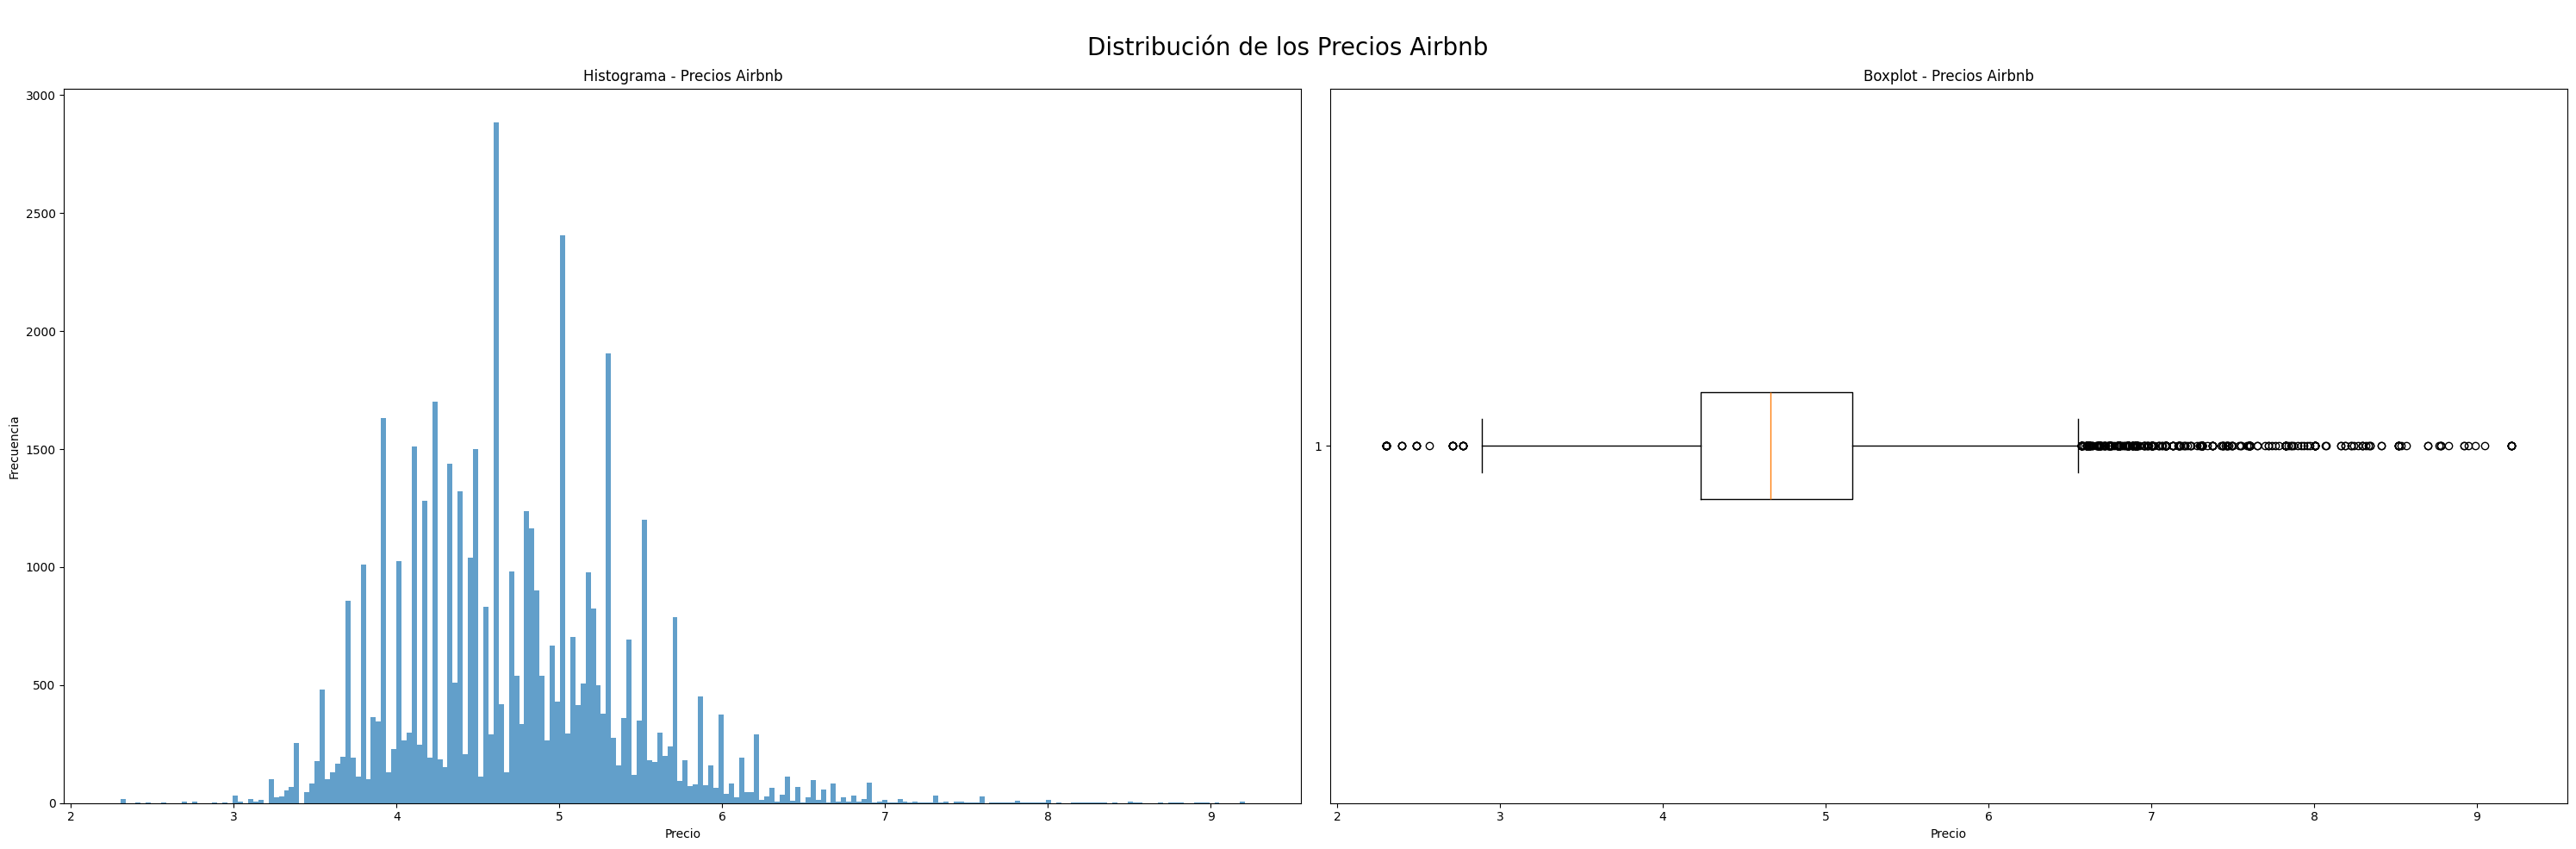

In [58]:
# Se trazan los gráficos utilizando la función de Matplotlib:
plt.figure(figsize = (30, 10));

# Subplot para el Histograma:
plt.subplot(1, 2, 1); 
plt.hist(df_clean['log_price'], bins=220, alpha = 0.7); # Como estimación para saber el bins se ha usado el redondeo de la raíz cuadrada del total de los datos que se manejan
plt.title("Histograma - Precios Airbnb");
plt.xlabel('Precio');
plt.ylabel('Frecuencia');

# Subplot para la Boxplot: 
plt.subplot(1, 2, 2);
plt.boxplot(df_clean['log_price'], vert = False);
plt.title("Boxplot - Precios Airbnb");
plt.xlabel("Precio");

# Mostrar la figura
plt.suptitle("\nDistribución de los Precios Airbnb", fontsize = 20);
plt.tight_layout()
plt.show()

Gracias a esta transformación, se ha **reducido en gran medida la asimetría** y, pese a seguir presentes, los **outliers tienen menos peso** en la representación. 

## Paso 4 - Limpieza a partir de Nulos:

Uno de los problemas que es habitual encontrarse en el análisis de datos es **variables sin valor**, **nulos**. 

Es por ello que se deben tratar estos casos para o bien **eliminarlos** o bien **rellenarlos** con un valor coherente para cada uno.

En primer lugar, para realizar el análisis, se va a obtener el **porcentaje de anuncios que presentan al menos un nulo** en alguna de las características. Para ello, se utiliza el método `.isnull().any()` explicitando que se debe realizar la búsqueda por columnas (`axis = 1`):



In [59]:
# Se comprueba el porcentaje de anuncios que presentan al menos un valor nulo:
print(f" El {round(df_clean.isnull().any(axis=1).mean()*100, 2)} % de los anuncios presenta, al menos, un valor nulo en alguna de sus características descriptivas");

 El 20.61 % de los anuncios presenta, al menos, un valor nulo en alguna de sus características descriptivas


Sabiendo que un porcentaje muy elevado de los anuncios tiene al menos un nulo en alguna de sus columnas, se va a **evaluar, característica por característica**, el **porcentaje de nulos** que se pueden encontrar en cada una de ellas madiante el método `.isnull()`.

In [60]:
# Se evalúa el porcentaje de nulos por característica:
df_clean.isnull().mean()*100

name                               0.032731
host_id                            0.000000
host_name                          0.042959
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.560920
reviews_per_month                 20.560920
calculated_host_listings_count     0.000000
availability_365                   0.000000
log_price                          0.000000
dtype: float64

A través de la información arriba mostrada, es evidente que hay **dos características** que son las principales **aportadoras de nulos** al conjunto de datos: `last_review` y `reviews_per_month`. Además, ambas dos presentan exactamente el **mismo porcentaje** de valores faltantes, lo que da a entender que son los **mismos anuncios** donde esas dos características tienen nulos. 

Para comprobarlo, se va a utilizar la librería `missingno`, en concreto su método `.matrix()` para ver de una forma visual las filas en las que se encuentran los nulos en el Data Frame:

<Axes: >

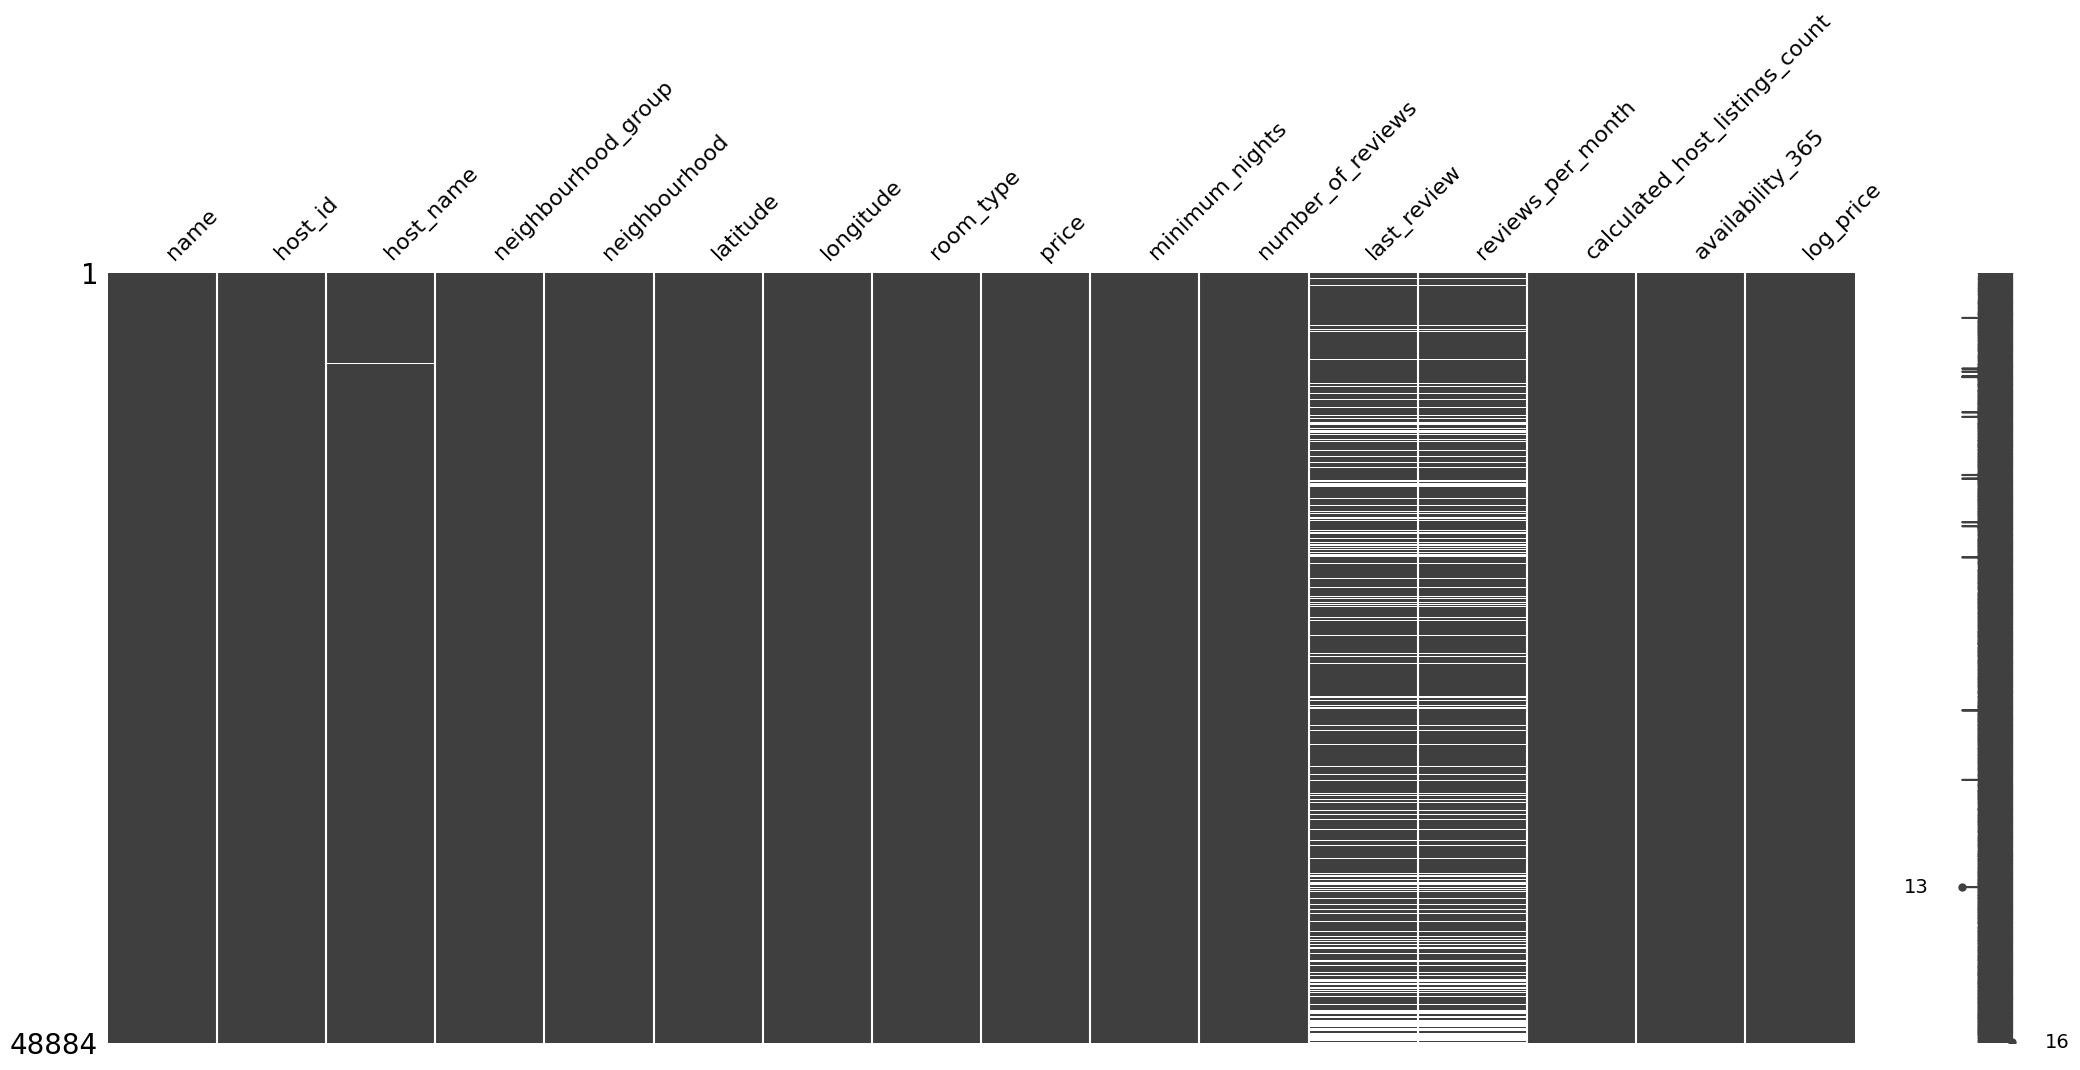

In [61]:
# Se obtiene de una forma visual dónde hay nulos en el Data Frame:
msno.matrix(df_clean)

Como se había anticipado, las dos características `last_review` y `reviews_per_month`, presentan los **valores nulos en exactamente los mismos anuncios**. 

Teniendo en cuenta el **porcenaje tan alto** que presentan de valores faltantes, se debe **decidir si se eliminan** estas dos columnas o **si se rellenan** con algún valor coherente. 

En este caso, dado que se tiene **otra característica** dentro del conjunto de datos que también hace referencia a las *reviews*, `number_of_reviews`, que **no tiene ningún valor faltante** en ninguna de las filas del Data Frame, **se decide eliminar estas dos columnas**. 

Esta decisión también se podría haber tomado más adelante, cuando se evalúen las correlaciones, dado que ambas características presentarán una muy alta correlación entre ellas y con el número de reseñas, por lo que se debían eliminar antes o después. 

In [62]:
# Se eliminan las dos columnas con el porcentaje tan alto de nulos:
df_clean.drop(['last_review', 'reviews_per_month'], axis=1, inplace=True);

/tmp/ipykernel_781/3774540428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(['last_review', 'reviews_per_month'], axis=1, inplace=True);


Siguiendo con el análisis, se deben seguir estudiando el resto de **características que presentan nulos** para o bien eliminarlas o bien rellenarlas. 

Por un lado, la variable `host_name`, referenciando al **nombre de la persona** que alquila el apartamento / habitación, presenta un pequeño porcentaje de valores nulos. 

En este caso, en el Data Frame se cuenta con una columna llamada `host_id` que guarda un **identificador para esta persona arrendadora** y no presenta **ningún nulo**. Esto implica que se tiene **información redundante**, dado que se tiene dos columnas para identificar a una misma persona. Por esta razón, se decide eliminar la columna `host_name` al no aportar ninguna información adicional al conjunto de datos: 

In [63]:
# Se elimina la columna host_name:
df_clean.drop(['host_name'], axis=1, inplace=True);

/tmp/ipykernel_781/678124718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(['host_name'], axis=1, inplace=True);


Finalmente, la otra característica que presenta un pequeño porcentaje de valores nulos es `name` haciendo referencia al **nombre del apartamento / habitación** en alquiler.

Este nombre **no da información real** acerca del apartamento, simplemente es una herramienta de marketing para poder alquilarlo. Por este motivo, y teniendo en cuenta que al trabajar en un DataFrame, la **identificación de cada anuncio se puede hacer de forma numérica a través del número de fila**, se decide **eliminar esta característica**:

In [64]:
# Se elimina la columna name:
df_clean.drop(['name'], axis=1, inplace=True);

/tmp/ipykernel_781/1660714217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(['name'], axis=1, inplace=True);


Después de realizar esta limpieza a partir de nulos, se comprueba que ya no hay ninguna fila con al menos un nulo: 

In [65]:
# Se comprueba el porcentaje de anuncios que presentan al menos un valor nulo:
print(f" El {round(df_clean.isnull().any(axis=1).mean()*100, 2)} % de los anuncios presenta, al menos, un valor nulo en alguna de sus características descriptivas");


 El 0.0 % de los anuncios presenta, al menos, un valor nulo en alguna de sus características descriptivas


Al haber obtenido un **total de 0 anuncios con nulos** en alguna de sus características, se puede continuar con el análisis al **no ser necesario imputar los valores faltantes** usando ningún algoritmo de aprendizaje automático. 

Finalmente, después de todas estas limpiezas realizadas, se comprueba cuánta información queda, es decir, se vuelve a utilizar el atributo `.shape` para saber el número de anuncios (filas) y el número de características (columnas).

In [66]:
# Se comprueba cuánta información queda después de la limpieza realizada:
print(f" El archivo cargado contiene {df.shape[0]} anuncios de casas en Airbnb, cada una ellas con un total de {df.shape[1]} características"); 

# Se calcula cuántos anuncios han sido eliminados tras la limpieza hasta el momento:
print(f" Tras la limpieza, se han eliminado un total de {np.abs(df.shape[0] - df_clean.shape[0])} anuncios");


 El archivo cargado contiene 48895 anuncios de casas en Airbnb, cada una ellas con un total de 15 características
 Tras la limpieza, se han eliminado un total de 11 anuncios


## Paso 5 - Limpieza a partir de las Observaciones Influyentes:

En este paso se va a proceder a realizar uno de los puntos clave en el Análisis Exploratorio de Datos, la Identificación de Observaciones Influyentes. 

Una **Observación Influyente** es un dato individual que tiene un **impacto desproporcionado** en los resultados del análisis, por ello es crucial **detectar este tipo de datos** y, aunque no tiene por qué ser necesario eliminarlos, es importante saber que existen. 

Sin embargo, para poder realizar este paso, es necesario que **todas las variables con las que se trabaja sean numéricas**. Por este motivo, lo primero que se ha de hacer es realizar la **codificación de variables categóricas a numéricas**.

### Paso 5.1 - Codificación de las Variables Categóricas a Numéricas:

Para poder realizar esta codificación, se debe **conocer qué variables categóricas** se tienen actualmente en el conjunto de datos, tras la limpieza realizada en pasos anteriores. 

Para ello, se va a utilizar el método `.describe(include=object)` para poder tener un **resumen** de este tipo de características y evaluar la información:

In [67]:
# Resumen informativo únicamente de las variables categóricas:
df_clean.describe(include = object).T

,count,unique,top,freq
neighbourhood_group,48884,5,Manhattan,21660
neighbourhood,48884,221,Williamsburg,3919
room_type,48884,3,Entire home/apt,25407


En primer lugar, cabe destacar que hay dos características que hacen referencia a información sobre en qué barrio se encuentra el apartamento / habitación en alquiler.

La variable `neighbourhood_group` incluye los **5 distritos de Nueva York** )Manhattan, Brooklyn, Queens, Bronx y Staten Island. Mientras que `neighbourhood`contiene los **221 barrios** que se distribuyen en esos 5 distritos. 

En este punto, pese a que se podría realizar un estudio más detallado, es muy probable que exista una correlación bastante alta entre barios de los mismos distritos. Por ello, antes de realizar la transformación, se decide **eliminar la columna `neighbourhood`** del conjunto de datos.

In [68]:
# Se elimina la columna neighbourhood:
df_clean.drop(['neighbourhood'], axis=1, inplace=True);

/tmp/ipykernel_781/2030044137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(['neighbourhood'], axis=1, inplace=True);


In [69]:
# Se vuelve a mostrar el Resumen de las variables categóricas restantes:
df_clean.describe(include = object).T

,count,unique,top,freq
neighbourhood_group,48884,5,Manhattan,21660
room_type,48884,3,Entire home/apt,25407


Una vez ya se cuenta con las dos variables categóricas que interesan, se va a proceder a realizar la codificación de sus valores. Para ambos casos, se va a **generar una nueva columna** en el Data Frame donde se vaya almacenando la **información codificada** y, una vez ya se haya acabado, se procederá a eliminar las columnas con los valores categóricos.

Como cada una de las características se desea codificar de acuerdo con un criterio, se van a emplear dos técnicas distintas:

- **Room Type:** Para esta variable, se quiere tener los datos codificados de acuerdo con un ranking lógico, según privilegio, como el siguiente:

<div style="text-align: center;">
    <b>Posición 1:</b> Entire home/apt<br>
    <b>Posición 2:</b> Private room<br>
    <b>Posición 3:</b> Shared room
</div>

Para conseguir este objetivo, la codificación de `room_type` se va a realizar de forma *manual*, explicitando mediante código **qué número hace referencia a cada valor** categórico.


In [70]:
# Se asigna a cada valor categórico, el número correspondiente al ranking por privilegio mencionado:
df_clean['room_type_num'] = df_clean['room_type'].map({'Entire home/apt': 1, 'Private room': 2, 'Shared room': 3});

/tmp/ipykernel_781/516029239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['room_type_num'] = df_clean['room_type'].map({'Entire home/apt': 1, 'Private room': 2, 'Shared room': 3});


- **Neighbourhood_group:** Para esta variable, se quiere tener los datos codificados de acuerdo con un orden alfabético:

<div style="text-align: center;">
    <b>0:</b> Bronx<br>
    <b>1:</b> Brooklyn<br>
    <b>2:</b> Manhattan<br>
    <b>3:</b> Queens<br>
    <b>4:</b> Staten Island
</div>


Para este caso, la codificacion de `neighbourhood_group` se va a realizar mediante una **instancia de un `LabelEncoder`** de la librería `scikit-learn`. 

Este codificador asigna los numeros de acuerdo con el orden de aparición en las filas del conjunto de datos. Por este motivo, se decide primero ajustar el encoder con los distritos en orden alfabético, `.fit()` y, posteriormente aplicar el encoder para crear la nueva columna `.transform()`

In [71]:
# Se crea una instancia del codificador:
encoder = LabelEncoder();

# Se ajusta el encoder con los distritos en orden alfabético:
encoder.fit(sorted(df_clean['neighbourhood_group'].unique()));

# Se aplica el encoer para almacenar la codificación en la nueva columna:
df_clean ['neighbourhood_group_int'] = encoder.transform (df_clean['neighbourhood_group']);

# Se comprueba que la información se ha codificado correctamente:
df_clean


/tmp/ipykernel_781/4219875408.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean ['neighbourhood_group_int'] = encoder.transform (df_clean['neighbourhood_group']);


,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,log_price,room_type_num,neighbourhood_group_int
0,2787,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365,5.003946,2,1
1,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,5.416100,1,2
2,4632,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365,5.010635,2,2
3,4869,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,4.488636,1,1
4,7192,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,4.382027,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Brooklyn,40.67853,-73.94995,Private room,70,2,0,2,9,4.248495,2,1
48891,6570630,Brooklyn,40.70184,-73.93317,Private room,40,4,0,2,36,3.688879,2,1
48892,23492952,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,1,27,4.744932,1,2
48893,30985759,Manhattan,40.75751,-73.99112,Shared room,55,1,0,6,2,4.007333,3,2


Como se puede comprobar, para los valores que se pueden ver la codificación se ha realizado de forma correcta por lo que se puede proceder al **borrado de las columnas con los valores categóricos**:

In [72]:
# Borrado de las columnas con los valores categóricos:
df_clean.drop(['room_type', 'neighbourhood_group'], axis=1, inplace=True);

/tmp/ipykernel_781/3027375328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(['room_type', 'neighbourhood_group'], axis=1, inplace=True);


### Paso 5.2 - Identificación de las Observaciones Influyentes:

Una vez ya todas las variables son numéricas, se puede continuar con el objetivo principal del Paso 5 para **analizar la existencia de observaciones influyentes**. 

De esta forma, en primer lugar, es necesario identificar cuál será, de ahora en adelante, la **variable dependiente**, es decir, la variable a *predecir* la *target variable* y separar tanto esta como todas las relacionadas con ella, del resto.

En este caso, la **variable a predecir** es el **precio** de un apartamento / habitación en alquiler, dadas ciertas características. Para ser más concreto, **se debe predecir `log_price`** al ser esta la variable que se ha obtenido con anterioridad para poder realizar un análisis más claro de los datos. 

Por ello, la **variable depdiente** será **`log_price`** mientras que del conjunto de **variables independientes** se debe **extraer tanto esta columna como `price`**. 


In [73]:
# Se separa la variable dependiente:
y = df_clean ['log_price'];

# Se guardan las variables independientes en una matrix, eliminando las características relacionadas con la dependiente:
X = df_clean.drop(['price','log_price'], axis = 1);

Ahora que se tienen los datos separados, se puede proceder a la identificación de observaciones influyentes a partir del estudio de la **Distancia de Cook**. 

Este parámetro ayuda a evaluar la **influencia de una observación** mediante los coeficientes de un **modelo de regresión lineal**. Si la Distancia de Cook de una observación es alta, significa que dicho dato puede estar alterando de forma muy notable el ajuste del modelo. 

Por este motivo, el primer paso consiste en **conseguir un modelo de regresión lineal** a partir de la partición realizada entre variables indepdientes (X) y la dependiente (y). 

Para ello, se ha de **incluir el término de ordenada en el origen** para asegurarse de que el modelo no asuma que la recta de regresión pasa por el origen. Esto se conseguirá con el método `.add_constant()` de la librería `statsmodels.api`. Posteriormente, se puede proceder a **ajustar el modelo de regresión lineal ordinaria** (OLS) calculando el mejor ajuste entre la variable dependiente e indepdientes:

In [74]:
# Se incluye el término de ordenada en el origen: 
X = sm.add_constant (X);

# Se ajusta el modelo de Regresión Lineal Ordinaria: 
model_OLS = sm.OLS(y, X).fit();

Una vez se tiene el modelo de regresión lineal ajustado, se puede calcular la **Distancia de Cook** para cada observación. 

Para ello, se va a utilizar el método `get_influence()`para obtener varios **diagnósticos de influencia** entre los que se encuentra la distancia de cook. Por este motivo, a continuación se va a explicitar que **se desea precisamente ese parámetro** `.cooks_distance`. 

In [75]:
# Se hace un diagnóstico de influencia y se extrae la Distancia de Cook: 
cooks_distance = model_OLS.get_influence().cooks_distance;

Para ver la **variabilidad** de este parámetro, se va a graficar un *scatter plot* de forma que se pueda estudiar claramente qué observaciones tienen una **distancia de cook más alta** y, por lo tanto, **alteran de forma más notable** el ajuste del modelo.

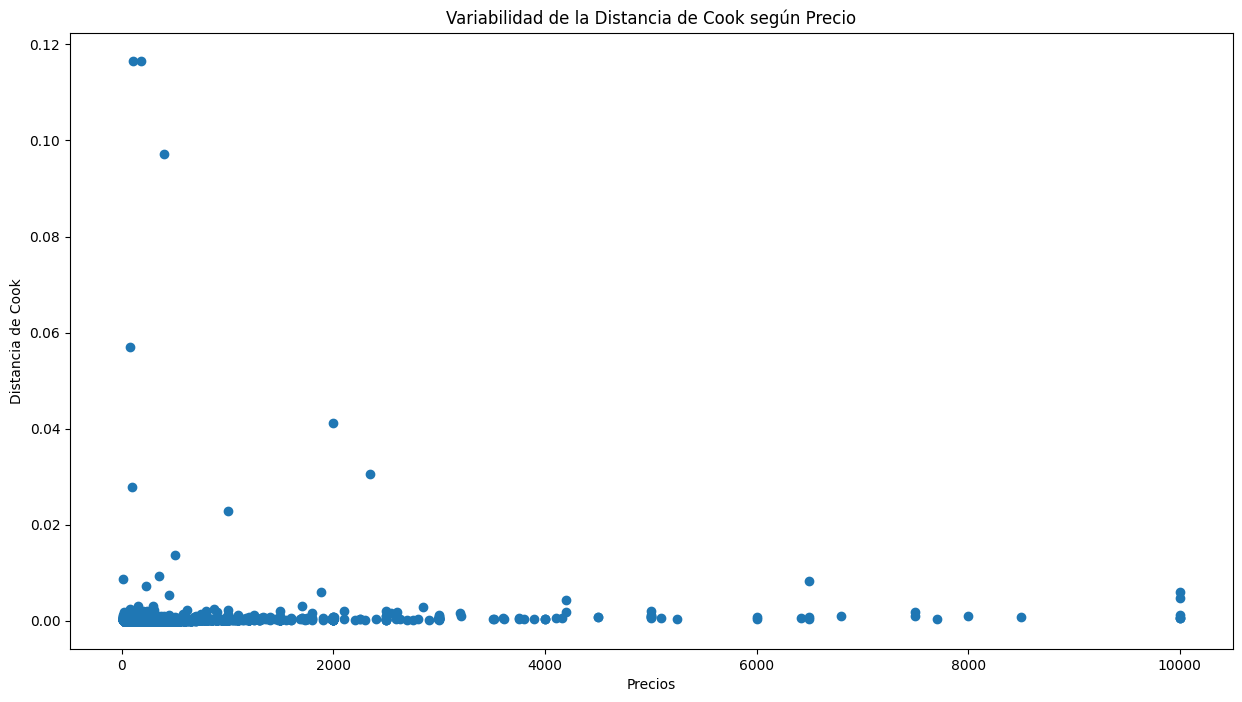

In [76]:
# Se trazan los gráficos utilizando la función de Matplotlib:
plt.figure(figsize = (15, 8));

# Se traza el scatter plot: 
plt.scatter (df_clean.price, cooks_distance[0]);
plt.xlabel('Precios');
plt.ylabel('Distancia de Cook');
plt.title("Variabilidad de la Distancia de Cook según Precio");
plt.show()

Como se puede observar hay un número considerable de observaciones cuya distancia de cook es notablemente más alta que la del resto. En este caso, además, se ve que estas observaciones se dan en los precios de alquiler más bajos, por lo que se entiende que el conjunto de las características que conforman dichos anuncios es *extraordinario*.

Hay una **norma estándar** que establece un **punto de corte para la Distancia de Cook**, a partir de la cual está *aceptado* que la **información dentro de un conjunto de datos presente**. Dicho límite es la **cuarta parte de la longitud total del DataFrame**.


In [77]:
# Se define el Punto de Corte:
cut_point = 4/len(df_clean);

# Se comprueba cuántas viviendas están por encima de ese punto de corte:
print(f" Hay un total de {len(np.where(cooks_distance[0]>cut_point)[0])} observaciones que se encuentran por encima del punto de corte");


 Hay un total de 2335 observaciones que se encuentran por encima del punto de corte


El número de anuncios que se consideran observaciones influyentes se considera **demasiado elevado**, dado el tamaño del conjunto de datos. Para analizarlo un poco más en detalle, se va a volver a graficar la scatter plot pero haciendo *zoom* en el eje de la distancia de cook:


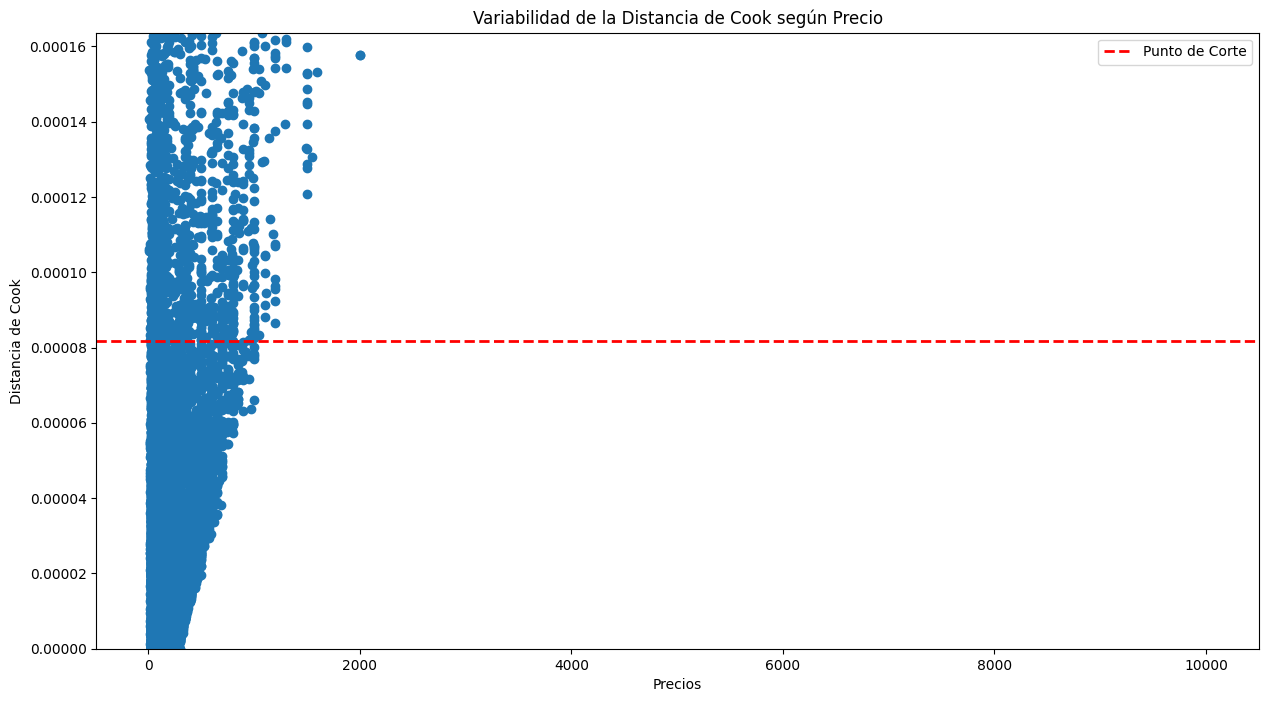

In [78]:
# Se trazan los gráficos utilizando la función de Matplotlib:
plt.figure(figsize = (15, 8));

# Se traza el scatter plot: 
plt.scatter (df_clean.price, cooks_distance[0]);
plt.xlabel('Precios');
plt.ylabel('Distancia de Cook');
plt.ylim (0, cut_point*2);
plt.axhline(y = cut_point, color = 'red', linestyle = '--', linewidth = 2, label = "Punto de Corte");
plt.title("Variabilidad de la Distancia de Cook según Precio");
plt.legend();
plt.show()

Como se puede comprobar, el **volumen de anuncios a eliminar es muy elevado**.

Llegado a este punto, al no conocer otro criterio para **establecer un punto de corte sensato**, se preguntó a los profesores de la clase y se comentó que, de momento, **se siguiese con el proyecto asumiendo ese valor** para el punto de corte.

Teniendo esto en cuenta, se procede a **eliminar las observaciones que se consideran influyentes**, es decir, las que se encuentran por encima del punto de corte:

In [79]:
# Se eliminan las observaciones influyentes:
df_clean = df_clean.drop(np.where(cooks_distance[0] > cut_point)[0]);

# Se calcula cuántos anuncios han sido eliminados tras la limpieza hasta el momento:
print(f" Tras la limpieza, se han eliminado un total de {np.abs(df.shape[0] - df_clean.shape[0])} anuncios");


 Tras la limpieza, se han eliminado un total de 2346 anuncios


## Paso 6 - Selección de Características:


Continuando con el proceso de preparación y compresión del conjunto de datos que implica un Análisis Explotario. se va a realizar una **Selección de Características**. 

Este paso es clave para asegurar un estudio más eficiente y preciso, permitiendo identificar las variables más relevantes ye liminando aquellas que aportan poca información o son redundantes. 